In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
X = dataset.iloc[:, [3, 4]].values
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

In [9]:
n_clusters_spectral = 5

In [10]:
sc = SpectralClustering(n_clusters=n_clusters_spectral,
                        affinity='nearest_neighbors', # Or 'rbf', 'laplacian', etc.
                        n_neighbors=10, # Number of neighbors for affinity graph
                        random_state=0)

In [11]:
labels_spectral = sc.fit_predict(X)
supervised = dataset.copy() # Make a copy
supervised['Cluster_group'] = labels_spectral # Assign Spectral Clustering labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
supervised.to_csv("cluster_spectral.csv", index=False)
print("Cluster labels assigned and saved to cluster_spectral.csv")

Cluster labels assigned and saved to cluster_spectral.csv


In [13]:
print(f"\nNumber of clusters (Spectral Clustering): {n_clusters_spectral}")


Number of clusters (Spectral Clustering): 5


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


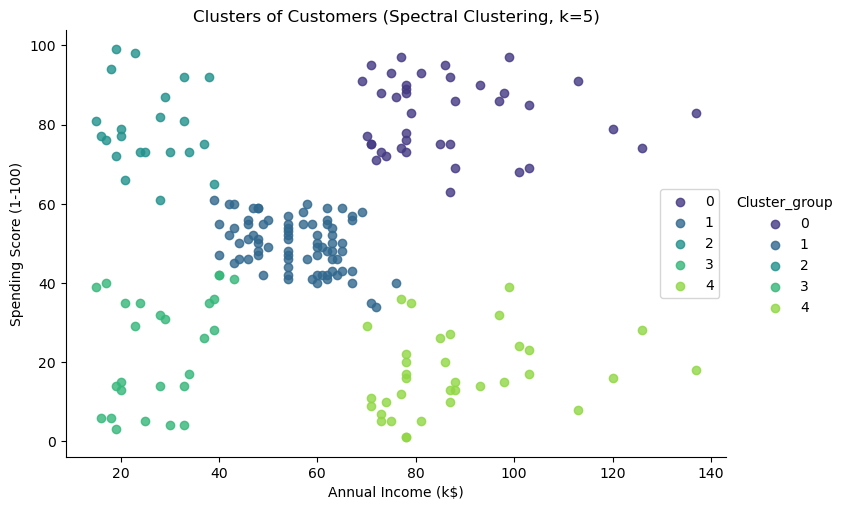

In [14]:
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True, palette='viridis', aspect=1.5)

plt.title(f'Clusters of Customers (Spectral Clustering, k={n_clusters_spectral})')
plt.xlabel(supervised.columns[3])
plt.ylabel(supervised.columns[4])
plt.legend()
plt.show()